In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples = 5000, n_features = 5, n_informative = 5, n_redundant
= 0, n_clusters_per_class = 1, random_state = 60)


In [ ]:
x.shape

(5000, 5)

In [ ]:
print("Total Number of Data points: ", x.shape[0])

Total Number of Data points:  5000


In [ ]:
print("Total Number of Features: ", x.shape[1])

Total Number of Features:  5


In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
print("Number of Classes: ", len(np.unique(y)))

Number of Classes:  2


In [ ]:
print("Number of Data points in each class:")
print(pd.value_counts(y))

Number of Data points in each class:
0    2500
1    2500
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp =  train_test_split(x, y, test_size=0.4, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Size of Train Data: ", x_train.shape)

Size of Train Data:  (3000, 5)


In [ ]:
print("Size of CV Data: ", x_cv.shape)

Size of CV Data:  (1000, 5)


In [ ]:
print("Size of Test Data: ", x_test.shape)

Size of Test Data:  (1000, 5)


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [ ]:
mean = list(scaler.mean_)
sd = [(i)**0.5 for i in scaler.var_]
for i in range(len(x_cv)):
  for j in range(len(x_cv[0])):
    x_cv[i, j] = (x_cv[i, j] - mean[j])/sd[j]

for i in range(len(x_test)):
  for j in range(len(x_test[0])):
    x_test[i, j] = (x_test[i, j] - mean[j])/sd[j]

In [ ]:
epochs = [1, 10, 100, 500, 1000, 5000]
train_acc,cv_acc = [],[]
best_epoch=-1
best_cv_score = -1
for e in epochs:
  model = SGDClassifier(max_iter=e)
  model.fit(x_train,y_train)
  tr_score = model.score(x_train,y_train)
  print("Training Accuracy: ", tr_score)
  train_acc.append(tr_score)

  cv_score = model.score(x_cv,y_cv)
  print("Cross validation Accuracy: ", cv_score)
  cv_acc.append(cv_score)

  if cv_score > best_cv_score:
    best_cv_score = cv_score
    best_epoch = e

Training Accuracy:  0.956
Cross validation Accuracy:  0.946
Training Accuracy:  0.9643333333333334
Cross validation Accuracy:  0.944
Training Accuracy:  0.963
Cross validation Accuracy:  0.952
Training Accuracy:  0.966
Cross validation Accuracy:  0.954
Training Accuracy:  0.9576666666666667
Cross validation Accuracy:  0.955
Training Accuracy:  0.9636666666666667
Cross validation Accuracy:  0.948


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
optimal_epoch = -1
min_diff = 200
epoch_index=-1
for i in range(len(train_acc)):
  if abs(train_acc[i]-cv_acc[i]) < min_diff:
    min_diff = abs(train_acc[i]-cv_acc[i])
    epoch_index = i

best_epoch = epochs[epoch_index]
best_epoch

1000

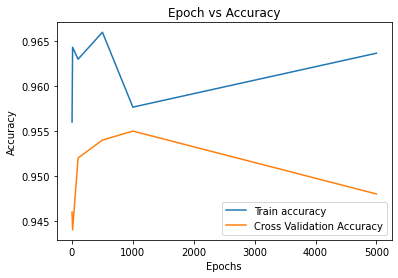

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, train_acc)
plt.plot(epochs,cv_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epoch vs Accuracy")
plt.legend(['Train accuracy','Cross Validation Accuracy'])
plt.show()

In [ ]:
print("Optimal epoch : ", best_epoch)

Optimal epoch :  1000


In [ ]:
sgdcModel = SGDClassifier(max_iter = best_epoch)
sgdcModel.fit(x_train, y_train)

SGDClassifier()

In [ ]:
y_pred = sgdcModel.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
y_pred.shape

(1000,)

In [ ]:
from sklearn.metrics import accuracy_score
print("Overall Accuracy on test data: ", accuracy_score(y_test,y_pred))

Overall Accuracy on test data:  0.964
